# TSUNAMI PREDICTION MODEL

In [252]:
!pip install folium

In [253]:
!pip install pandas

![title](unnamed.png)

## About Tsunamis
Tsunamis are caused by earthquakes, volcanic eruptions, or landslides in seas and oceans. Such movements can transport vast amounts of water, creating huge waves. A tsunami is usually a series of waves, although frequently, the first wave is not the most destructive. Their destruction power is enormous, also illustrated by the fact that they can reach a width of up to 100 kilometres, a height of up to 30 meters, and a speed of up to 800 kilometres per hour (in the deep ocean). 

## Load Data

In [291]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium
import numpy as np
import statistics

In [292]:
#only run this if you have UTF codec error
tsunamisData = pd.read_csv('Historical_Tsunamis2.csv',sep=';', engine='python', encoding='latin-1')
weather = pd.read_csv('WeatherbyCountry.csv', sep=',',engine='python', encoding='latin-1')

In [293]:

#tsunamisData = pd.read_csv('Historical_Tsunamis2.csv',sep=';')
#weather = pd.read_csv('WeatherbyCountry.csv', sep=',')


In [294]:
Lunar_ecp = pd.read_csv('Lunar_eclipses.csv', sep=',')
Solar_ecp = pd.read_csv('Solar_eclipses.csv', sep=',')
planets = pd.read_csv('Planets_in_signs.csv', sep=',')

# Exploring Tsunamis

### Cause:

In [295]:
tsunamisData.groupby(['CAUSE'])['DEATHS'].count()

CAUSE
                                     24658
Earthquake                            1697
Earthquake and Landslide                89
Explosion                                1
Landslide                               66
Meteorological                          33
Questionable Earthquake                 10
Unknown                                142
Volcano                                108
Volcano and Earthquake                  10
Volcano and Landslide                    9
Volcano, Earthquake and Landslide        1
Name: DEATHS, dtype: int64

In [296]:
tsunamisData.columns


Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

In [297]:
tsunamisData.groupby(['DAMAGE_DES'])['DAMAGE_TOT'].count()

DAMAGE_DES
                                  24672
Extreme (~$25 million or more)       71
Limited (<$1 million)              1440
Moderate (~$1 to $5 million)        394
None                                  2
Severe (~>$5 to $24 million)        245
Name: DAMAGE_TOT, dtype: int64

###  Tsunamis by Year & Month

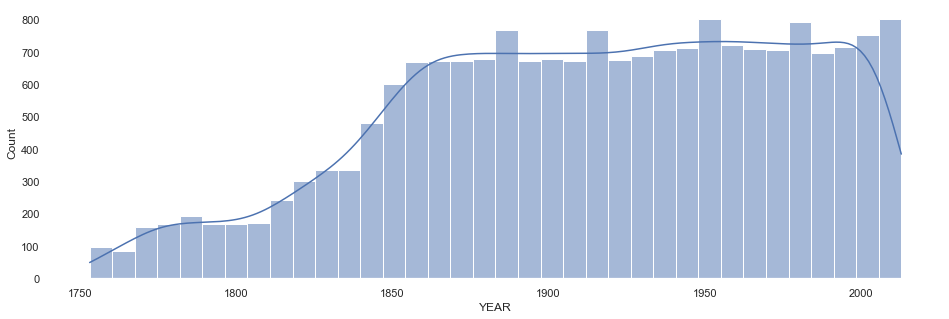

In [298]:
plt.figure(figsize=(16,5))
sns.histplot(data=Joined_data, x="YEAR",kde=True);

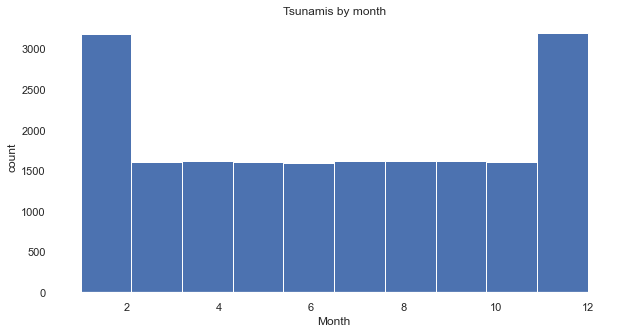

In [299]:
plt.figure(figsize=(10,5))
plt.title('Tsunamis by month')
plt.xlabel('Month')
plt.ylabel('count')
Joined_data['MONTH'].hist();


### Tsunami Intensity

Tsunami Intensity is The measure of strength, force, or energy. In this data, Intensity (I) is calculated according to the formula:

I= 1/2+ Log2 Hav where Hav is the water hight. For example:

I = 4 for 11 meters
I = 5 for 22.5 meters
The new scales Papadopoulus and Imamura includes 12 categories according to the effects on humans, on nature and objects, including vessels of variable size, and on buildings and other engineered constructions:

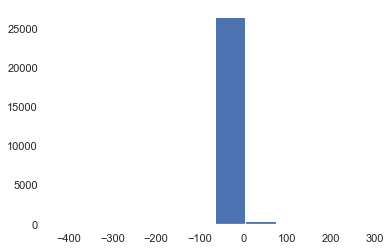

In [300]:

Tsunami_Intensity = tsunamisData[~tsunamisData['TS_INTENSI'].isnull()]
Tsunami_Intensity['TS_INTENSI'].describe()
Tsunami_Intensity['TS_INTENSI'].hist();

### Earthquake Magnitud

The most destructive tsunamis are generated from large, shallow earthquakes with an epicenter or fault line near or on the ocean floor. Usually, it takes an earthquake with a Richter magnitude exceeding 7.5 to produce a destructive tsunami.
For this example I have grouped Earthquake Maginute.

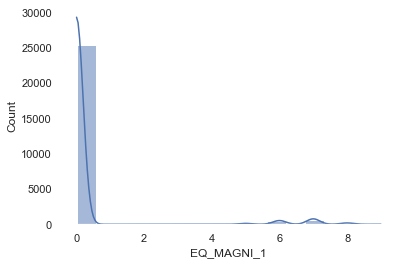

In [301]:
sns.histplot(data=tsunamisData, x='EQ_MAGNI_1',kde=True);

In [302]:
y=[0.09953,.529821,1.180848,2.482377,6.130305]
x=['Magnitud_below5','Magnitud_5to6','Magnitud_6to7','Magnitud_7to8','Magnitud_8to9']


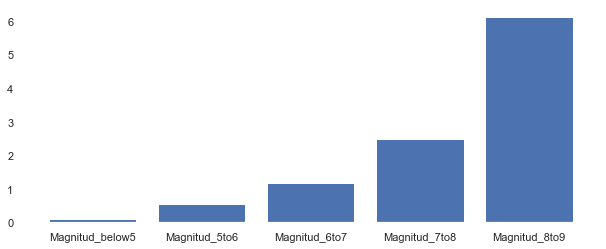

In [303]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show();

### Tsunamis by Country

Countries with the highest death toll by Tsunamis are  Haiti, Indonesia  and Japan.
Haiti catastrophic magnitude 7.0 Mw earthquake struck Haiti at 16:53 local time on Tuesday, 12 January 2010 and left a devasting death toll of 316,000.

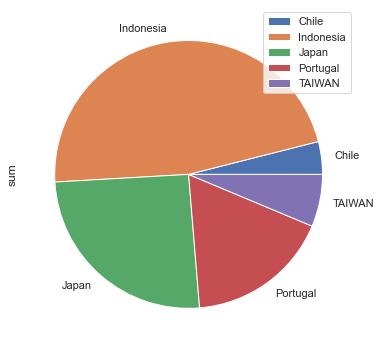

In [304]:
Deaths_by_Countries = (tsunamisData['DEATHS']>10000)
temp=tsunamisData[Deaths_by_Countries]

ctry=temp.groupby(['COUNTRY']).agg({'DEATHS':['sum']}).plot(kind='pie', y='DEATHS',figsize=(6, 8))
ctry;

In [305]:
tsunamisData.groupby(['COUNTRY'])['ID'].count().sort_values(ascending=False)

COUNTRY
Japan                               11721
USA                                  3796
Indonesia                            2031
Chile                                1167
USA TERRITORY                         559
                                    ...  
AFRICA, NORTH COAST                     1
SINT EUSTATIUS (DUTCH TERRITORY)        1
DENMARK                                 1
CYPRUS ISLAND                           1
LIBYA                                   1
Name: ID, Length: 150, dtype: int64

In [306]:
tsunamisData['COUNTRY'].value_counts(normalize=True)

Japan            0.436959
USA              0.141515
Indonesia        0.075716
Chile            0.043506
USA TERRITORY    0.020840
                   ...   
PACIFIC OCEAN    0.000037
GUYANA           0.000037
BELGIUM          0.000037
DEAD SEA         0.000037
NEPAL            0.000037
Name: COUNTRY, Length: 150, dtype: float64

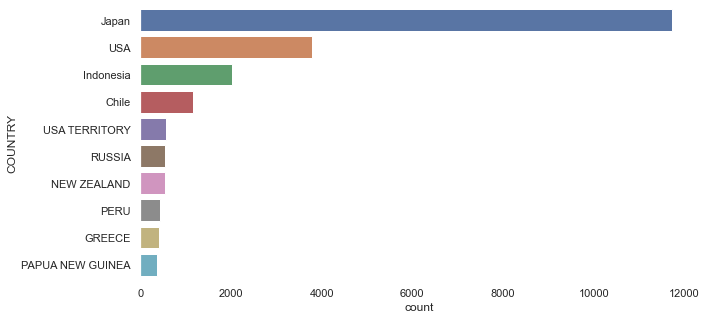

In [307]:
plt.figure(figsize= (10,5) )
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.countplot(data=tsunamisData, y='COUNTRY', order=tsunamisData.COUNTRY.value_counts().iloc[:10].index)
plt.show();

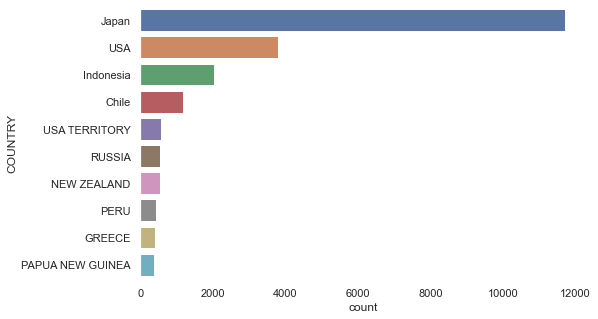

In [308]:
plt.figure(figsize= (8,5) )
sns.countplot(data=tsunamisData, y='COUNTRY', order=tsunamisData.COUNTRY.value_counts().iloc[:10].index)
plt.show();

### Deaths

In [309]:
Deaths_by_Countries = (tsunamisData['DEATHS']>10000)
temp = tsunamisData[Deaths_by_Countries]
temp[['COUNTRY','YEAR','DEATHS']].sort_values(by='DEATHS', ascending=False)

,COUNTRY,YEAR,DEATHS
993,Indonesia,2004,226898
12382,Portugal,1755,60000
12995,Portugal,1755,50000
6844,TAIWAN,1782,40000
3520,Indonesia,1883,36000
3886,Indonesia,1883,34417
18998,Japan,1498,31000
24836,Japan,1896,27122
18040,Japan,1498,26000
5592,Chile,1868,25000


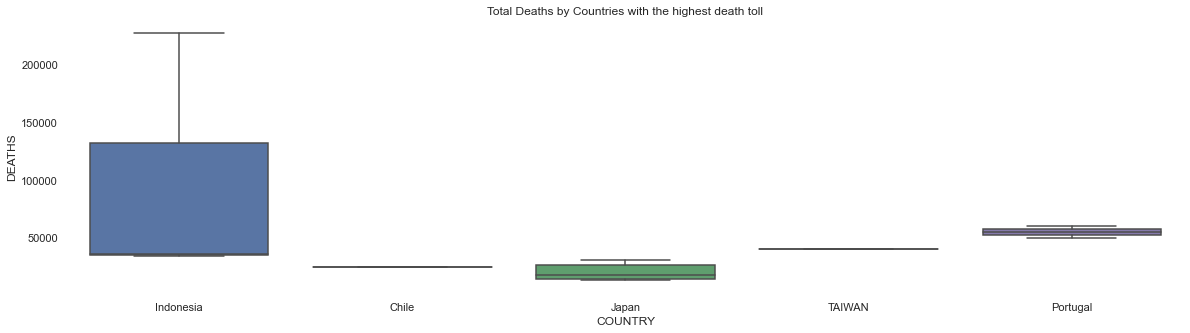

In [310]:
plt.figure(figsize=(20, 5))
sns.boxplot(x= "COUNTRY", y='DEATHS', data = temp)
plt.title("Total Deaths by Countries with the highest death toll");

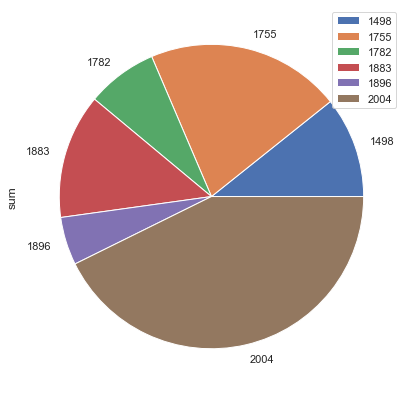

In [311]:
Deaths_by_Year = (tsunamisData['DEATHS']>25000)
temp=tsunamisData[Deaths_by_Year]

yr=temp.groupby(['YEAR']).agg({'DEATHS':['sum']}).plot(kind='pie', y='DEATHS',figsize=(10, 7))
yr;

### Location

In [312]:
tsunamisData[['LATITUDE', 'LONGITUDE', 'DEATHS']].describe()

,LATITUDE,LONGITUDE,DEATHS
count,2.682400e+04,2.682400e+04,26824.000000
mean,7.455681e+06,2.613332e+07,34.965479
std,1.531440e+07,5.864581e+07,1577.698745
min,-4.123333e+07,-1.781798e+08,0.000000
25%,3.330000e+02,-7.399500e+03,0.000000
50%,2.089500e+04,1.780200e+04,0.000000
75%,3.901670e+05,5.016483e+06,0.000000
max,6.449920e+07,1.738167e+08,226898.000000


In [313]:
temp = tsunamisData[['LATITUDE', 'LONGITUDE','DEATHS']]
temp = temp.dropna()

my_zip = zip(temp['LATITUDE'], temp['LONGITUDE'],temp['DEATHS'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(5283, 95247, 0),
 (5355, 95242, 0),
 (5436, 95235, 0),
 (55, 9775, 50),
 (415, 961, 135),
 (5479, 95249, 0),
 (5572, 95325, 0),
 (5584, 95347, 0),
 (5571, 95325, 0),
 (5575, 95326, 0),
 (5593, 95367, 0),
 (555, 95304, 0),
 (5562, 95317, 0),
 (5594, 95335, 0),
 (5588, 95361, 0)]

In [314]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="OpenStreetMap")


In [315]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10))

In [316]:
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="Stamen Terrain", width="%100",
height="%100")

In [317]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10,width=600,height=400))

## Cleaning Tsunami Data

In [318]:
tsunamisData

,ID,TSEVENT_ID,YEAR,MONTH,DAY,Date,ARR_DAY,ARR_HOUR,ARR_MIN,TRAV_HOURS,...,DAMAGE_TOT,HOUSES_D_4,HOUSES_TOT,INJURIES_T,INJURIES_1,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,NUM_DEPOSI
0,15817,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
1,15818,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
2,15820,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
3,869,904,1861,2,16,1861/02/16,0,0,0,4,...,,0,,0,0,,0,0,,0
4,866,904,1861,2,16,1861/02/16,0,0,0,0,...,,0,,0,0,,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,25495,5463,2012,8,31,31/08/2012,31,18,41,5,...,,0,,0,0,,0,0,,0
26820,465,549,1788,7,21,1788/07/21,0,0,0,0,...,,0,,0,0,,0,0,,0
26821,25668,5472,2013,1,5,05/01/2013,5,9,20,0,...,,0,,0,0,,0,0,,0
26822,25669,5472,2013,1,5,05/01/2013,5,9,45,0,...,,0,,0,0,,0,0,,0


In [319]:
#Replace Country names to match Water data:
#New_Country = text.replace ('JAPAN','Japan')
#New_Country = text.replace ('PORTUGAL','Portugal')
#New_Country = text.replace ('TAIWAN','Taiwan')
#New_Country = text.replace ('CHILE','Chile')
#New_Country = text.replace ('INDONESIA','Indonesia')
#New_Country = text.replace ('USA','United States')
#New_Country = text.replace ('RUSSIA','Russia')
#New_Country = text.replace ('NEW ZEALAND','New Zealand')

In [320]:
TOPTsunamis=(tsunamisData.loc[tsunamisData['COUNTRY'].isin(['Japan', 'Portugal', 'Taiwan', 'Chile', 'Indonesia', 
                                                            'United States', 'Russia', 'New Zealand'])])


In [321]:
TOPTsunamis.shape

(14968, 52)

In [322]:
TOPTsunamis.columns

Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

I have added column 'Earthquake Mayor/Great'where 1 ('yes') represents Earthquakes above 7.0 magnitude in the Richter scale. These are Earthquakes which cause serious or severe destruction and loss of life over large areas.

In [323]:
TOPTsunamis['Earthquake Mayor/Great']=0

<ipython-input-323-3e044f95fea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPTsunamis['Earthquake Mayor/Great']=0


I have added column 'Earthquake Mayor/Great'where 1 ('yes') represents Earthquakes above 7.0 magnitude in the Richter scale. These are Earthquakes which cause serious or severe destruction and loss of life over large areas.

In [324]:
TOPTsunamis.loc[TOPTsunamis['EQ_MAGNI_1']>7,'Earthquake Mayor/Great'] = 1
TOPTsunamis['DEATHS'].describe()

C:\Users\imypo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


count     14968.000000
mean         51.688536
std        2078.508495
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      226898.000000
Name: DEATHS, dtype: float64

In [325]:
TOPTsunamis.groupby(['Earthquake Mayor/Great']).agg('DEATHS')

In [326]:
columns_to_keep = ['ID','Date','YEAR','MONTH','COUNTRY','CAUSE','EQ_MAGNI_1','DEATHS','LATITUDE', 'LONGITUDE']

In [327]:
TOPTsunamisCLEAN =TOPTsunamis[columns_to_keep].groupby(by=['YEAR','MONTH','COUNTRY']).agg({ 
    'CAUSE':statistics.mode,
    'EQ_MAGNI_1':"mean",
    'ID':"first",
    'DEATHS':["mean", 'max', 'std'],
    'Date': 'first'
}).reset_index()
TOPTsunamisCLEAN

YEAR MONTH    COUNTRY       CAUSE EQ_MAGNI_1     ID DEATHS           \
                                  mode       mean  first   mean max  std   
0    -210     0   Portugal  Earthquake   0.000000   4281    0.0   0  NaN   
1     -60     0   Portugal  Earthquake   6.000000   4263    0.0   0  NaN   
2     365     7   Portugal               0.000000  19369    0.0   0  NaN   
3     382     0   Portugal  Earthquake   0.000000   4273    0.0   0  NaN   
4     416     0  Indonesia               0.000000  25336    0.0   0  0.0   
..    ...   ...        ...         ...        ...    ...    ...  ..  ...   
777  2014     4      Chile               0.208333  30268    0.0   0  0.0   
778  2014     4      Japan               0.000000  29883    0.0   0  0.0   
779  2014     7      Japan               0.857143  30639    0.0   0  0.0   
780  2014    10      Chile               1.400000  30647    0.0   0  0.0   
781  2014    11  Indonesia               1.750000  31041    0.0   0  0.0   

            Date  
           first  
0    -0210/??/??  
1    -0060/??/??  
2     0365/07/21  
3     0382/??/??  
4     0416/??/??  
..           ...  
777   01/04/2014  
778   01/04/2014  
779   11/07/2014  
780   09/10/2014  
781   15/11/2014  

[782 rows x 10 columns]

In [328]:
TOPTsunamisCLEAN.columns.droplevel(0)
TOPTsunamisCLEAN.columns = ["YEAR", "MONTH", "COUNTRY", 
                            "CAUSE_MODE", "EQ_MAGNI_MEAN", "ID_FIRST", 
                            "DEATHS_MEAN", "DEATHS_MAX", "DEATHS_STD", 'DATE_FIRST']

In [329]:
TOPTsunamisCLEAN['Event_Tsunami']=1
TOPTsunamisCLEAN['Event_Earthquake']=0

In [330]:
TOPTsunamisCLEAN.loc[TOPTsunamisCLEAN['CAUSE_MODE'].str.contains('Earthquake'),'Event_Earthquake'] = 1

In [331]:
TOPTsunamisCLEAN[TOPTsunamisCLEAN['CAUSE_MODE'].str.contains('Earthquake')]['CAUSE_MODE'].value_counts()

Earthquake                  164
Volcano and Earthquake        4
Earthquake and Landslide      4
Name: CAUSE_MODE, dtype: int64

In [332]:
## to check!!
TOPTsunamisCLEAN['CAUSE_MODE'].value_counts()


                            576
Earthquake                  164
Unknown                      17
Volcano                      12
Volcano and Earthquake        4
Earthquake and Landslide      4
Meteorological                3
Landslide                     2
Name: CAUSE_MODE, dtype: int64

In [333]:
TOPTsunamisCLEAN[TOPTsunamisCLEAN['CAUSE_MODE'].str.contains('Earthquake')].Event_Earthquake.value_counts()

1    172
Name: Event_Earthquake, dtype: int64

#### Cleaning Tsunamis from year 1700 until now

In [334]:
condition3=TOPTsunamisCLEAN.sort_values(by='DATE_FIRST').reset_index()['DATE_FIRST'].str.startswith(pat='')
TOPTsunamisCLEAN[condition3].head()

,YEAR,MONTH,COUNTRY,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake
0,-210,0,Portugal,Earthquake,0.0,4281,0.0,0,NaN,-0210/??/??,1,1
1,-60,0,Portugal,Earthquake,6.0,4263,0.0,0,NaN,-0060/??/??,1,1
2,365,7,Portugal,,0.0,19369,0.0,0,NaN,0365/07/21,1,0
3,382,0,Portugal,Earthquake,0.0,4273,0.0,0,NaN,0382/??/??,1,1
4,416,0,Indonesia,,0.0,25336,0.0,0,0.0,0416/??/??,1,0


In [335]:
TOPTsunamisCLEAN[1:]


,YEAR,MONTH,COUNTRY,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake
1,-60,0,Portugal,Earthquake,6.000000,4263,0.0,0,NaN,-0060/??/??,1,1
2,365,7,Portugal,,0.000000,19369,0.0,0,NaN,0365/07/21,1,0
3,382,0,Portugal,Earthquake,0.000000,4273,0.0,0,NaN,0382/??/??,1,1
4,416,0,Indonesia,,0.000000,25336,0.0,0,0.0,0416/??/??,1,0
5,684,11,Japan,,2.666667,34,0.0,0,0.0,0684/11/29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
777,2014,4,Chile,,0.208333,30268,0.0,0,0.0,01/04/2014,1,0
778,2014,4,Japan,,0.000000,29883,0.0,0,0.0,01/04/2014,1,0
779,2014,7,Japan,,0.857143,30639,0.0,0,0.0,11/07/2014,1,0
780,2014,10,Chile,,1.400000,30647,0.0,0,0.0,09/10/2014,1,0


In [336]:
TOPTsunamisCLEAN=TOPTsunamisCLEAN[119:]
TOPTsunamisCLEAN

,YEAR,MONTH,COUNTRY,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake
119,1703,12,Japan,,0.190476,277,160.238095,5233,809.096178,1703/12/31,1,0
120,1704,0,Japan,,0.000000,283,0.000000,0,0.000000,1704/??/??,1,0
121,1704,1,Japan,Unknown,0.000000,370,0.000000,0,NaN,1704/01/??,1,0
122,1705,11,Chile,,0.000000,10747,0.000000,0,0.000000,1705/11/26,1,0
123,1707,10,Japan,,0.516129,10424,344.161290,5000,960.981169,1707/10/28,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
777,2014,4,Chile,,0.208333,30268,0.000000,0,0.000000,01/04/2014,1,0
778,2014,4,Japan,,0.000000,29883,0.000000,0,0.000000,01/04/2014,1,0
779,2014,7,Japan,,0.857143,30639,0.000000,0,0.000000,11/07/2014,1,0
780,2014,10,Chile,,1.400000,30647,0.000000,0,0.000000,09/10/2014,1,0


In [337]:
# split column into multiple columns by delimiter to delete data with ?? 
temp=TOPTsunamisCLEAN['DATE_FIRST'].str.split('/', expand=True)
temp

,0,1,2
119,1703,12,31
120,1704,??,??
121,1704,01,??
122,1705,11,26
123,1707,10,28
...,...,...,...
777,01,04,2014
778,01,04,2014
779,11,07,2014
780,09,10,2014


In [338]:
temp.columns = ["DAY","MONTH","YEAR"]
temp['YEAR'].head()

119    31
120    ??
121    ??
122    26
123    28
Name: YEAR, dtype: object

In [339]:
temp["DAY"]= temp["DAY"].str.replace('?',"")
temp["MONTH"]= temp["MONTH"].str.replace('?',"")
temp["YEAR"]= temp["YEAR"].str.replace('?',"")

<ipython-input-339-e291bea84f58>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  temp["DAY"]= temp["DAY"].str.replace('?',"")
<ipython-input-339-e291bea84f58>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  temp["MONTH"]= temp["MONTH"].str.replace('?',"")
<ipython-input-339-e291bea84f58>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  temp["YEAR"]= temp["YEAR"].str.replace('?',"")


In [58]:
temp.head()

,DAY,MONTH,YEAR
119,1703,12,31
120,1704,,
121,1704,01,
122,1705,11,26
123,1707,10,28


In [59]:
#temp[temp.DAY==""].head()
#temp[temp.MONTH==""].count()
temp[temp.YEAR==""].count()

DAY      24
MONTH    24
YEAR     24
dtype: int64

In [60]:
index_dates = temp[(temp['YEAR'] == '')].index
index_dates


Int64Index([120, 121, 130, 133, 140, 146, 164, 168, 172, 177, 178, 188, 190,
            197, 206, 209, 235, 237, 258, 264, 273, 299, 319, 330],
           dtype='int64')

In [61]:
TOPTsunamisCLEAN.drop(index_dates, inplace = True)


C:\Users\imypo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
# convert date objet into datetime type:
TOPTsunamisCLEAN['DATE_FIRST']=pd.to_datetime(TOPTsunamisCLEAN['DATE_FIRST'])

<ipython-input-62-810fc31a8537>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPTsunamisCLEAN['DATE_FIRST']=pd.to_datetime(TOPTsunamisCLEAN['DATE_FIRST'])


In [63]:
# split date objet into columns YEAR & MONTH:
TOPTsunamisCLEAN['YEAR'] = TOPTsunamisCLEAN['DATE_FIRST'].dt.year
TOPTsunamisCLEAN['MONTH'] = TOPTsunamisCLEAN['DATE_FIRST'].dt.month

<ipython-input-63-c6142a0c47cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPTsunamisCLEAN['YEAR'] = TOPTsunamisCLEAN['DATE_FIRST'].dt.year
<ipython-input-63-c6142a0c47cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPTsunamisCLEAN['MONTH'] = TOPTsunamisCLEAN['DATE_FIRST'].dt.month


In [64]:
TOPTsunamisCLEAN

,YEAR,MONTH,COUNTRY,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake
119,1703,12,Japan,,0.190476,277,160.238095,5233,809.096178,1703-12-31,1,0
122,1705,11,Chile,,0.000000,10747,0.000000,0,0.000000,1705-11-26,1,0
123,1707,10,Japan,,0.516129,10424,344.161290,5000,960.981169,1707-10-28,1,0
124,1708,2,Japan,,1.400000,28227,0.000000,0,0.000000,1708-02-13,1,0
125,1708,11,Indonesia,,0.000000,25290,0.000000,0,0.000000,1708-11-28,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
777,2014,1,Chile,,0.208333,30268,0.000000,0,0.000000,2014-01-04,1,0
778,2014,1,Japan,,0.000000,29883,0.000000,0,0.000000,2014-01-04,1,0
779,2014,11,Japan,,0.857143,30639,0.000000,0,0.000000,2014-11-07,1,0
780,2014,9,Chile,,1.400000,30647,0.000000,0,0.000000,2014-09-10,1,0


In [65]:
TOPTsunamisCLEAN['Event_Tsunami'].value_counts()

1    639
Name: Event_Tsunami, dtype: int64

In [66]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [67]:
#CORRELATION EXPLORER - TO CHECK!!!
@interact
def correlations(column1=list(TOPTsunamisCLEAN.select_dtypes('number').columns), 
                 column2=list(Lunar_ecp.select_dtypes('number').columns)):
    print(f"Correlation: {TOPTsunamisCLEAN[column1].corr(Lunar_ecp[column2])}")

interactive(children=(Dropdown(description='column1', options=('YEAR', 'MONTH', 'EQ_MAGNI_MEAN', 'ID_FIRST', '…

#### WEATHER DATA

In [68]:
weather.shape

(577462, 4)

In [69]:
weather.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY
0,1743-11-01,4.384,2.294,Ã land
1,1743-12-01,NaN,NaN,Ã land
2,1744-01-01,NaN,NaN,Ã land
3,1744-02-01,NaN,NaN,Ã land
4,1744-03-01,NaN,NaN,Ã land


In [70]:
weather.columns[weather.isnull().any()]

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'COUNTRY'], dtype='object')

In [71]:
weather.isnull().sum()

Date                                 0
AverageTemperature               34737
AverageTemperatureUncertainty    33998
COUNTRY                           2277
dtype: int64

In [72]:
#We interpolate the missing value with a value in between the line before and the line after
#We need to decide how many NaN consecutive values we would likt to fill the dataset is quite large 
#and the joins of data below don´t run because of it
weather_interpol=weather.interpolate(method='ffill', limit=2)

In [73]:
weather_interpol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           577462 non-null  object 
 1   AverageTemperature             545472 non-null  float64
 2   AverageTemperatureUncertainty  546214 non-null  float64
 3   COUNTRY                        575187 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [74]:
weather

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY
0,1743-11-01,4.384,2.294,Ã land
1,1743-12-01,NaN,NaN,Ã land
2,1744-01-01,NaN,NaN,Ã land
3,1744-02-01,NaN,NaN,Ã land
4,1744-03-01,NaN,NaN,Ã land
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [75]:
TOPWeather=(weather.loc[weather['COUNTRY'].isin(['Japan', 'Portugal', 'Taiwan', 'Chile', 'Indonesia', 
                                                 'United States','Russia','New Zealand'])])

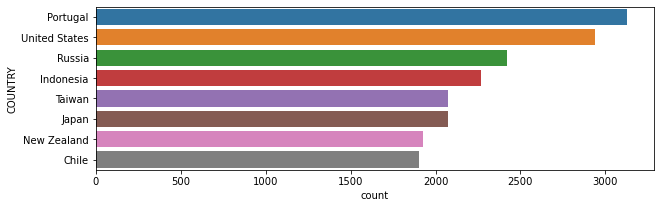

In [76]:
plt.figure(figsize= (10,3) )

sns.countplot(data=TOPWeather, y='COUNTRY', order=TOPWeather.COUNTRY.value_counts().iloc[:10].index)
plt.show()

In [77]:
# convert date objet into datetime type:
TOPWeather['Date'] = pd.to_datetime(TOPWeather['Date'])

<ipython-input-77-96e0540a9bc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPWeather['Date'] = pd.to_datetime(TOPWeather['Date'])


In [78]:
# split date objet into columns YEAR & MONTH:
TOPWeather['YEAR'] = TOPWeather['Date'].dt.year
TOPWeather['MONTH'] = TOPWeather['Date'].dt.month

<ipython-input-78-0d2e648ed934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPWeather['YEAR'] = TOPWeather['Date'].dt.year
<ipython-input-78-0d2e648ed934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOPWeather['MONTH'] = TOPWeather['Date'].dt.month


In [79]:
TOPWeather

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH
108248,1855-05-01,7.152,1.296,Chile,1855,5
108249,1855-06-01,4.257,1.641,Chile,1855,6
108250,1855-07-01,4.113,1.313,Chile,1855,7
108251,1855-08-01,5.508,1.168,Chile,1855,8
108252,1855-09-01,6.684,1.153,Chile,1855,9
...,...,...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States,2013,5
557817,2013-06-01,20.198,0.236,United States,2013,6
557818,2013-07-01,22.074,0.152,United States,2013,7
557819,2013-08-01,21.168,0.249,United States,2013,8


## Lunar_ecp from year 1700 until 2100

In [80]:
#If we don´t want to lose data:
#import datetime as dt
#Lunar_ecp['DATE_STRIN'] = Lunar_ecp['DATE_STRIN'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d') if type(x)==str else pd.NaT)
#print(type(my_df.iloc[0][1]))

In [81]:
condition=Lunar_ecp.sort_values(by='DATE_STRIN').reset_index()['DATE_STRIN'].str.startswith(pat='2100')
Lunar_ecp[condition].head()

,DATE_STRIN,LATITUDE,LONGITUDE,PENUMBRAL,PARTIAL ECLIPSE,DURATION
5056,2100/2/24,10N,138E,244.6,-,-
5057,2100/8/19,13S,36E,254.2,-,-


In [82]:
Lunar_ecp=Lunar_ecp.sort_values(by='DATE_STRIN').reset_index()
Lunar_ecp=Lunar_ecp[3842:5056]

In [83]:
Lunar_ecp=Lunar_ecp.drop(['index'], axis=1)
Lunar_ecp.head()

,DATE_STRIN,LATITUDE,LONGITUDE,PENUMBRAL,PARTIAL ECLIPSE,DURATION
3842,1700/3/5,6N,111W,324.5,212.7,97.5
3843,1700/8/29,9S,165E,373.8,233.7,101.7
3844,1701/2/22,11N,11E,277.0,138.8,-
3845,1701/8/18,14S,158E,307.8,114.3,-
3846,1702/1/14,20N,21W,194.5,-,-


In [84]:
Lunar_ecp['EVENT']='lunar_eclipse'

In [85]:
Lunar_ecp.isnull().sum()

DATE_STRIN         0
LATITUDE           0
LONGITUDE          0
PENUMBRAL          0
PARTIAL ECLIPSE    0
DURATION           0
EVENT              0
dtype: int64

In [86]:
# convert date objet into datetime type:
Lunar_ecp['DATE_STRIN'] = pd.to_datetime(Lunar_ecp['DATE_STRIN'])

In [87]:
# split date objet into columns YEAR & MONTH:
Lunar_ecp['YEAR'] = Lunar_ecp['DATE_STRIN'].dt.year
Lunar_ecp['MONTH'] = Lunar_ecp['DATE_STRIN'].dt.month

In [88]:
Lunar_ecp

,DATE_STRIN,LATITUDE,LONGITUDE,PENUMBRAL,PARTIAL ECLIPSE,DURATION,EVENT,YEAR,MONTH
3842,1700-03-05,6N,111W,324.5,212.7,97.5,lunar_eclipse,1700,3
3843,1700-08-29,9S,165E,373.8,233.7,101.7,lunar_eclipse,1700,8
3844,1701-02-22,11N,11E,277.0,138.8,-,lunar_eclipse,1701,2
3845,1701-08-18,14S,158E,307.8,114.3,-,lunar_eclipse,1701,8
3846,1702-01-14,20N,21W,194.5,-,-,lunar_eclipse,1702,1
...,...,...,...,...,...,...,...,...,...
5051,2097-04-26,13S,176E,344.0,195.2,-,lunar_eclipse,2097,4
5052,2098-10-10,7N,143W,357.4,221,82.7,lunar_eclipse,2098,10
5053,2098-04-15,10S,74E,338.3,215.8,89,lunar_eclipse,2098,4
5054,2099-04-05,7S,127W,257.7,88.1,-,lunar_eclipse,2099,4


#Transforming Lunar_ecp into datetime has lost 5581 lines from the 7244!

## Solar_ecp from year 1700 until 2100

In [89]:
#condition2=Solar_ecp.sort_values(by='DATE_STRIN').reset_index()['DATE_STRIN'].str.startswith(pat='')
#Solar_ecp[condition2].head()

In [90]:
Solar_ecp=Solar_ecp[4015:4950]

In [91]:
Solar_ecp.head()

,DATE_STRIN,ECLIPSE_TYPE,MAGNITUD,LATITUDE,LONGITUDE,DURATION,EVENT
4015,1700/2/18,P,0.3744,71.2N,132.4E,NaN,solar_eclipse
4016,1700/8/14,P,0.7000,70.6S,117.5W,NaN,solar_eclipse
4017,1700/9/13,P,0.2996,71.9N,87.6W,NaN,solar_eclipse
4018,1701/2/7,A,0.9219,25.9N,171.7W,09m55s,solar_eclipse
4019,1701/8/4,T,1.0521,9.4S,33.7E,05m06s,solar_eclipse


In [92]:
#To convert from month and year to datetime as to not lose the NaN values in DATE
#import datetime
#TOPTsunamisCLEAN['DATE'] = pd.to_datetime(dict(year=TOPTsunamisCLEAN.YEAR, month=TOPTsunamisCLEAN.MONTH, day=1))


In [93]:
# convert date objet into datetime type:
Solar_ecp['DATE_STRIN'] = pd.to_datetime(Solar_ecp['DATE_STRIN'])

#### Transforming all data into datetime coercing the dates out of boundaries (will convert into NA) & transforming data to year and month for all datasets:

In [94]:
# split date objet into columns YEAR & MONTH:
Solar_ecp['YEAR'] = Solar_ecp['DATE_STRIN'].dt.year
Solar_ecp['MONTH'] = Solar_ecp['DATE_STRIN'].dt.month

In [95]:
Solar_ecp.isnull().sum()

DATE_STRIN        0
ECLIPSE_TYPE      0
MAGNITUD          0
LATITUDE          0
LONGITUDE         0
DURATION        334
EVENT             0
YEAR              0
MONTH             0
dtype: int64

In [96]:
Solar_ecp

,DATE_STRIN,ECLIPSE_TYPE,MAGNITUD,LATITUDE,LONGITUDE,DURATION,EVENT,YEAR,MONTH
4015,1700-02-18,P,0.3744,71.2N,132.4E,NaN,solar_eclipse,1700,2
4016,1700-08-14,P,0.7000,70.6S,117.5W,NaN,solar_eclipse,1700,8
4017,1700-09-13,P,0.2996,71.9N,87.6W,NaN,solar_eclipse,1700,9
4018,1701-02-07,A,0.9219,25.9N,171.7W,09m55s,solar_eclipse,1701,2
4019,1701-08-04,T,1.0521,9.4S,33.7E,05m06s,solar_eclipse,1701,8
...,...,...,...,...,...,...,...,...,...
4945,2093-07-23,A,0.9463,54.6N,1.3E,05m11s,solar_eclipse,2093,7
4946,2094-01-16,T,1.0342,84.8S,10.6W,01m51s,solar_eclipse,2094,1
4947,2094-06-13,P,0.1618,65.3S,163.6W,NaN,solar_eclipse,2094,6
4948,2094-07-12,P,0.4224,68.0N,152.8E,NaN,solar_eclipse,2094,7


### PLANETS

In [97]:
# convert date objet into datetime type:
planets['DATE_STRIN'] = pd.to_datetime(planets['DATE_STRIN'])

In [98]:
# split date objet into columns YEAR & MONTH:
planets['YEAR'] = planets['DATE_STRIN'].dt.year
planets['MONTH'] = planets['DATE_STRIN'].dt.month

In [99]:
planets

,DATE_STRIN,PLANET_POSITION,YEAR,MONTH
0,1920-01-22,Uranus enters Pisces,1920,1
1,1927-03-31,Uranus enters Aries,1927,3
2,1927-11-04,Uranus Rx enters Pisces,1927,11
3,1928-01-13,Uranus enters Aries,1928,1
4,1928-09-21,Neptune enters Virgo,1928,9
...,...,...,...,...
107,2040-02-25,Uranus Rx enters Cancer,2040,2
108,2040-05-15,Uranus enters Leo,2040,5
109,2043-03-08,Pluto enters Pisces,2043,3
110,2043-08-31,Pluto Rx enters Aquarius,2043,8


#Similarly for Solar_ecp we have lost 5491

In [100]:
planetmisingdates_df=pd.DataFrame()

planetmisingdates_df.head()

""


In [101]:
planetmisingdates_df['DATE_STRIN']=pd.period_range(start='1920-01-22', end='2100-03-31', freq='M').to_timestamp()
planetmisingdates_df['DATE_STRIN']=pd.to_datetime(planetmisingdates_df['DATE_STRIN'])

In [102]:
planetmisingdates_df['YEAR'] = planetmisingdates_df['DATE_STRIN'].dt.year
planetmisingdates_df['MONTH'] = planetmisingdates_df['DATE_STRIN'].dt.month

In [103]:
planetmisingdates_df.dtypes


DATE_STRIN    datetime64[ns]
YEAR                   int64
MONTH                  int64
dtype: object

In [104]:
planetmisingdates_df.head()

,DATE_STRIN,YEAR,MONTH
0,1920-01-01,1920,1
1,1920-02-01,1920,2
2,1920-03-01,1920,3
3,1920-04-01,1920,4
4,1920-05-01,1920,5


In [105]:
planetmisingdates_df=planetmisingdates_df.drop('DATE_STRIN',axis=1)

In [106]:
planets2=pd.merge(planetmisingdates_df,planets,on=["YEAR","MONTH"],how='left')


In [107]:
planets2.isnull().sum()


YEAR                  0
MONTH                 0
DATE_STRIN         2054
PLANET_POSITION    2054
dtype: int64

In [108]:
planets2.shape


(2166, 4)

In [109]:
planets2=planets2.ffill(axis=None, inplace=False, limit=None, downcast=None).head()

In [110]:
planets2.head()

,YEAR,MONTH,DATE_STRIN,PLANET_POSITION
0,1920,1,1920-01-22,Uranus enters Pisces
1,1920,2,1920-01-22,Uranus enters Pisces
2,1920,3,1920-01-22,Uranus enters Pisces
3,1920,4,1920-01-22,Uranus enters Pisces
4,1920,5,1920-01-22,Uranus enters Pisces


In [111]:
TOPTsunamisCLEAN['Event_Tsunami'].value_counts()

1    639
Name: Event_Tsunami, dtype: int64

## Joining Data

In [112]:
Weather_Tsunamis= pd.merge(TOPWeather,TOPTsunamisCLEAN, on=["YEAR","MONTH","COUNTRY"], how='left')
Weather_Tsunamis

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake
0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,1855-08-01,5.508,1.168,Chile,1855,8,Earthquake,0.0,847.0,0.0,0.0,NaN,1855-08-11,1.0,1.0
4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,2013-05-01,14.073,0.178,United States,2013,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
18748,2013-06-01,20.198,0.236,United States,2013,6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
18749,2013-07-01,22.074,0.152,United States,2013,7,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
18750,2013-08-01,21.168,0.249,United States,2013,8,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [113]:
Weather_Tsunamis['Event_Tsunami'].value_counts()

1.0    548
Name: Event_Tsunami, dtype: int64

In [114]:
#Adding Lunar
Join1= pd.merge(Weather_Tsunamis,Lunar_ecp, on=["YEAR","MONTH"], how='left')
Join1

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,...,DATE_FIRST,Event_Tsunami,Event_Earthquake,DATE_STRIN,LATITUDE,LONGITUDE,PENUMBRAL,PARTIAL ECLIPSE,DURATION,EVENT
0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,1855-05-02,15S,62W,346.1,221.5,96.5,lunar_eclipse
1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,1855-08-01,5.508,1.168,Chile,1855,8,Earthquake,0.0,847.0,0.0,...,1855-08-11,1.0,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,2013-05-01,14.073,0.178,United States,2013,5,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,2013-05-25,19S,63W,33.6,-,-,lunar_eclipse
19175,2013-06-01,20.198,0.236,United States,2013,6,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
19176,2013-07-01,22.074,0.152,United States,2013,7,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
19177,2013-08-01,21.168,0.249,United States,2013,8,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#Adding Solar Eclipses
Join2= pd.merge(Join1,Solar_ecp, on=["YEAR","MONTH"], how='left')
Join2

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,...,PARTIAL ECLIPSE,DURATION_x,EVENT_x,DATE_STRIN_y,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y
0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,NaN,...,221.5,96.5,lunar_eclipse,1855-05-16,P,0.7624,62.9N,16.6E,NaN,solar_eclipse
1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,1855-08-01,5.508,1.168,Chile,1855,8,Earthquake,0.0,847.0,0.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19200,2013-05-01,14.073,0.178,United States,2013,5,NaN,NaN,NaN,NaN,...,-,-,lunar_eclipse,2013-05-10,A,0.9544,2.2N,175.5E,06m03s,solar_eclipse
19201,2013-06-01,20.198,0.236,United States,2013,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
19202,2013-07-01,22.074,0.152,United States,2013,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
19203,2013-08-01,21.168,0.249,United States,2013,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#Adding Planetary Positions
Joined_data= pd.merge(Join2,planets, on=["YEAR","MONTH"], how='left')
Joined_data.to_csv('Joined_data.csv')

In [117]:
Joined_data['Lunar_Eclipse']=0
Joined_data['Solar_Eclipse']=0

In [118]:
Joined_data.loc[Joined_data['EVENT_x']=='lunar_eclipse','Lunar_Eclipse']=1
Joined_data.loc[Joined_data['EVENT_y']=='solar_eclipse','Solar_Eclipse']=1
Joined_data

,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,...,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y,DATE_STRIN,PLANET_POSITION,Lunar_Eclipse,Solar_Eclipse
0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,NaN,...,P,0.7624,62.9N,16.6E,NaN,solar_eclipse,NaT,NaN,1,1
1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
3,1855-08-01,5.508,1.168,Chile,1855,8,Earthquake,0.0,847.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,2013-05-01,14.073,0.178,United States,2013,5,NaN,NaN,NaN,NaN,...,A,0.9544,2.2N,175.5E,06m03s,solar_eclipse,NaT,NaN,1,1
19225,2013-06-01,20.198,0.236,United States,2013,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
19226,2013-07-01,22.074,0.152,United States,2013,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0
19227,2013-08-01,21.168,0.249,United States,2013,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,0


In [119]:
Joined_data.to_csv('Joined_data.csv')

## References

data.world: https://data.world/dhs/historical-tsunami-event

weather: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data